In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from pathlib import Path
import os
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
import scipy.ndimage as ndimage
import cv2

import sys  
sys.path.append(str(Path().resolve().parent))
from Grayscale import get_grayscale_from_jpg_png
import PixelArrays
import LungSegmentation.LungSegmentationUtilities as utils
from LungSegmentation.LungSegmentation_MethodXRayUNet_jpg_png import predict_single_lung_mask, predict_multiple_lung_mask, predict_single_lung_mask_from_array, predict_multiple_lung_mask_from_array

In [2]:
folder_name = r"D:\Studia\sem7\inzynierka\data\COVID-19 Radiography Database"
covid_folder = Path(folder_name) / "COVID-19"
normal_folder = Path(folder_name) / "NORMAL"

covid = os.listdir(covid_folder)
normal = os.listdir(normal_folder)

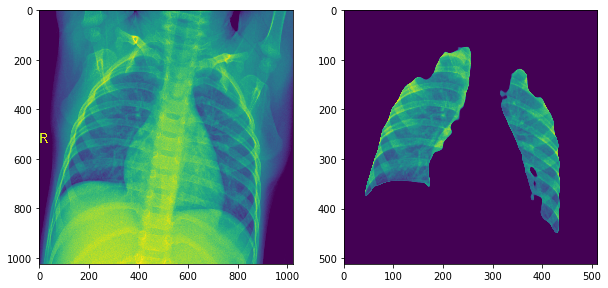

In [53]:
image = get_grayscale_from_jpg_png(normal[10], str(normal_folder))
mask = predict_single_lung_mask(normal[10], str(normal_folder))
# compare_plots(image, mask)
utils.compare_plots(image, mask*cv2.resize(image, (512, 512)))

In [62]:
def show_test(image, mask): 
    fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=[20, 20])
    mask2 = np.where(mask > 0.1, 1, 0)
    mask3 = utils.fill_contours(mask2, min_length=100)
    mask4 = ndimage.gaussian_filter(mask3, sigma=0.2)
    ax0.imshow(image)
    ax1.imshow(mask2)
    ax2.imshow(mask3)
    ax3.imshow(mask4)
    ax4.imshow(mask4*cv2.resize(image, (512, 512)))
    plt.show()

# Histogram ciemnego zdjęcia

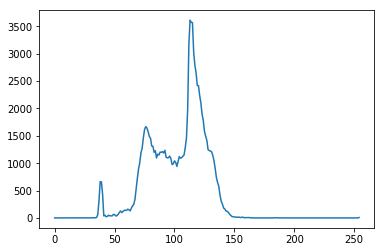

In [100]:
a = images_covid[9]*255
hist, bins = np.histogram(a,bins=np.arange(0,256,1)) 
plt.plot(bins[:-1], hist)
# a.shape
# hist.shape
# bins.shape

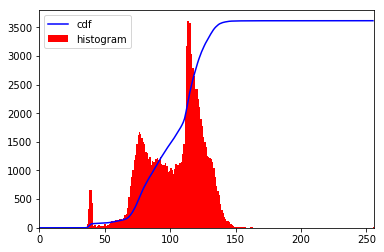

In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = (images_covid[9]*255).astype('int')

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [107]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [108]:
img2 = cdf[img]

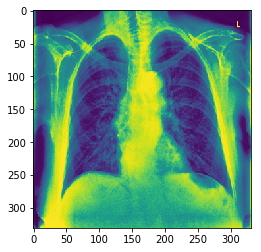

In [110]:
plt.imshow(img2)

In [111]:
cv2.imwrite('res.png',img2)

True

In [112]:
image = get_grayscale_from_jpg_png('res.png', r"D:\Studia\sem7\inzynierka\aplikacja\ImagingCOVID-19\Methods\jupyter_notebook_files")
mask = predict_single_lung_mask('res.png', r"D:\Studia\sem7\inzynierka\aplikacja\ImagingCOVID-19\Methods\jupyter_notebook_files")

In [113]:
plt.imshow(mask)

# Histogram normalnego zdjęcia

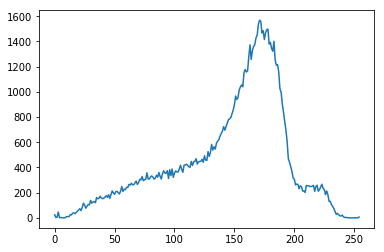

In [101]:
b = images_covid[7]*255
hist, bins = np.histogram(b,bins=np.arange(0,256,1)) 
plt.plot(bins[:-1], hist)

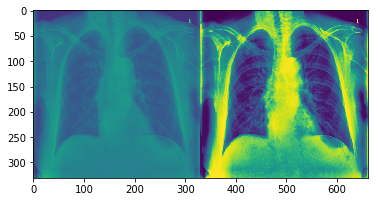

In [121]:
img = (images_covid[9]*255).astype(np.uint8)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
# cv2.imwrite('res.png',res)
plt.imshow(res)

In [118]:
img = cv2.imread('res.png',0)

# Przygotowanie danych

In [3]:
images = [get_grayscale_from_jpg_png(normal[i], str(normal_folder)) for i in range(10)]
images_covid = [get_grayscale_from_jpg_png(covid[i], str(covid_folder)) for i in range(10)]

In [6]:
def equ_image(image):
    img = (image*255).astype(np.uint8)
    equ = cv2.equalizeHist(img)
    return equ / 255

In [7]:
masks_normal = predict_multiple_lung_mask_from_array(images[0:10])
masks_covid = predict_multiple_lung_mask_from_array(images_covid[0:10])

normal_hist = [equ_image(img) for img in images[0:10]]
covid_hist = [equ_image(img) for img in images_covid[0:10]]

masks_normal_hist = predict_multiple_lung_mask_from_array(normal_hist)
masks_covid_hist = predict_multiple_lung_mask_from_array(covid_hist)

In [11]:
def compare_images(img, img_hist, mask, mask_hist):
    fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=[20, 20])
    mask2 = np.where(mask_hist > 0.1, 1, 0)
    mask3 = utils.fill_contours(mask2, min_length=100)
    mask4 = ndimage.gaussian_filter(mask3, sigma=0.2)
    ax0.imshow(img)
    ax0.set_title("Original")
    ax1.imshow(img_hist)
    ax1.set_title("Histogram Equalization")
    ax2.imshow(mask)
    ax2.set_title("Mask original")
    ax3.imshow(mask_hist)
    ax3.set_title("Mask equ")
    ax4.imshow(mask4*cv2.resize(img, (512, 512)))
    plt.show()

# Covid

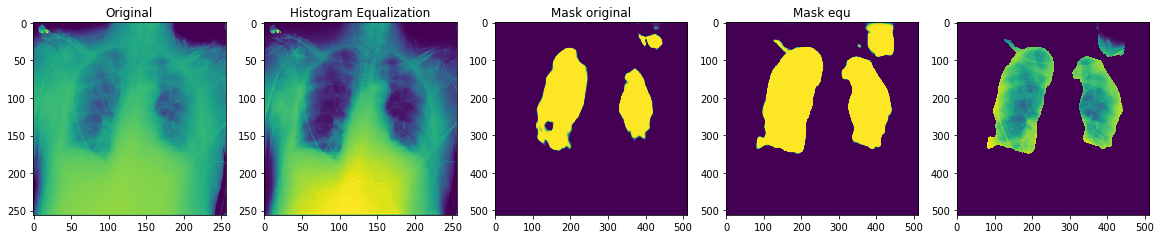

In [12]:
i = 0
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

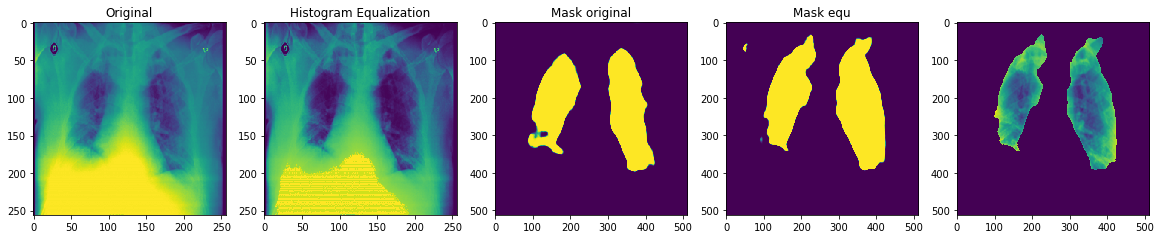

In [13]:
i = 1
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

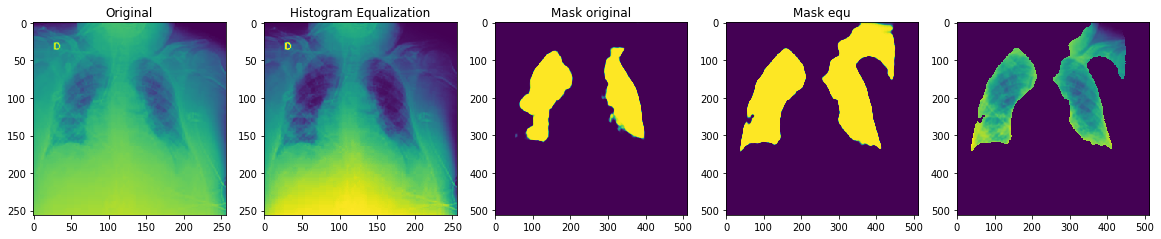

In [14]:
i = 2
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

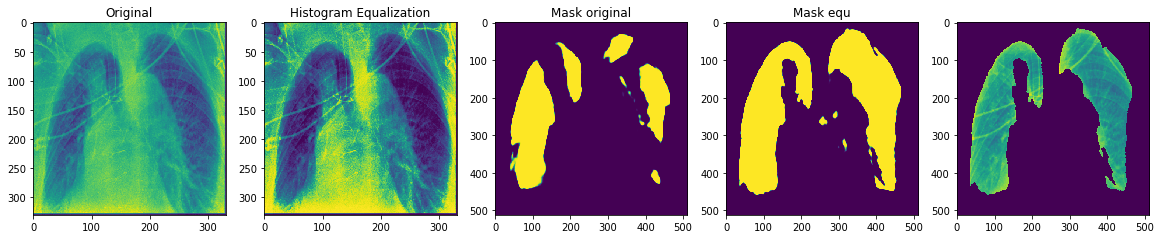

In [15]:
i = 3
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

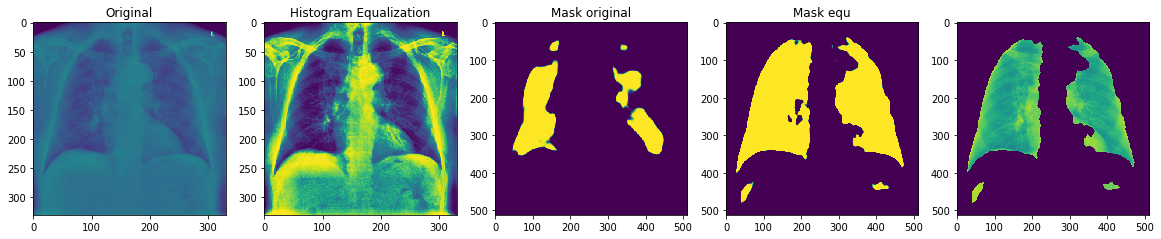

In [16]:
i = 4
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

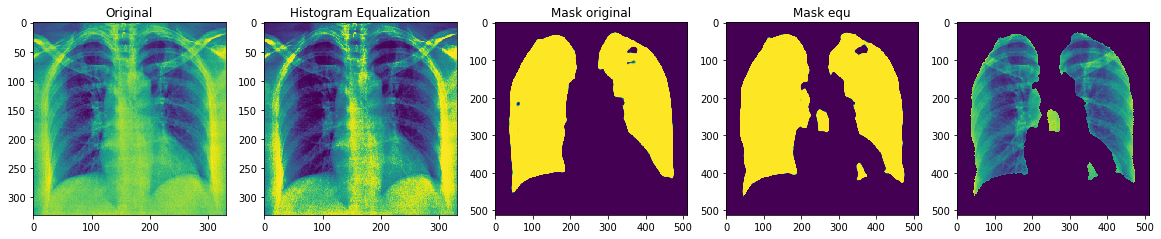

In [18]:
i = 5
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

In [19]:
i = 6
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

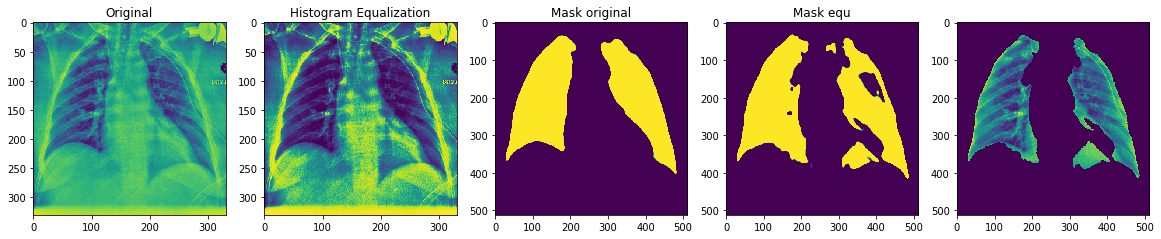

In [20]:
i = 7
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

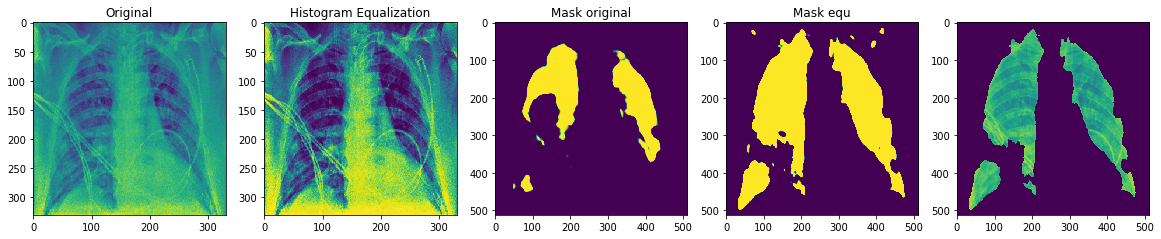

In [21]:
i = 8
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

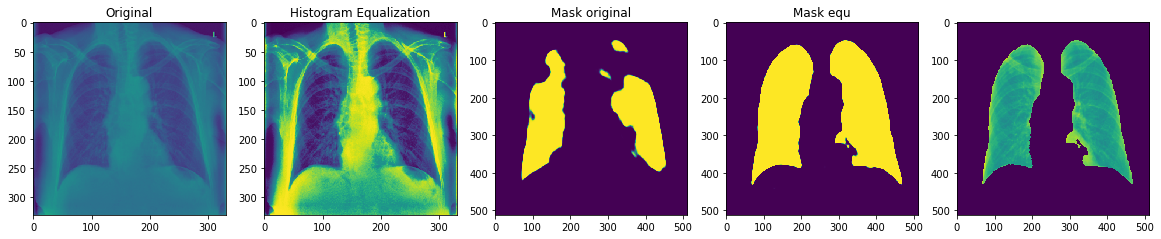

In [22]:
i = 9
compare_images(images_covid[i], covid_hist[i], masks_covid[i], masks_covid_hist[i])

# Normal

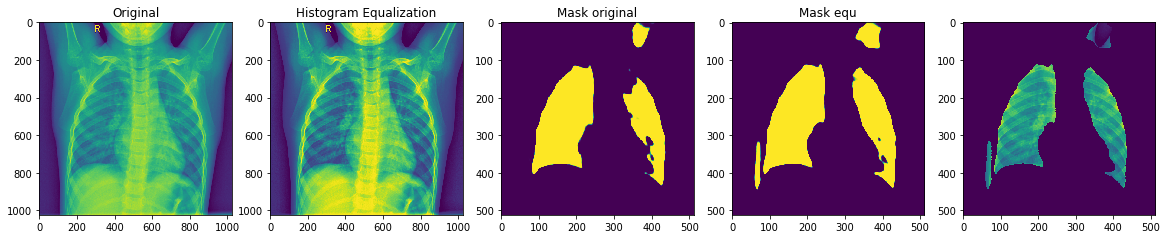

In [23]:
i = 0
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

In [17]:
i = 1
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

In [24]:
i = 2
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

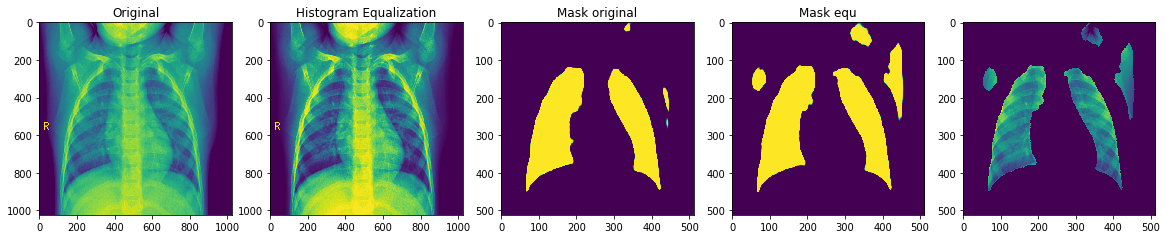

In [25]:
i = 3
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

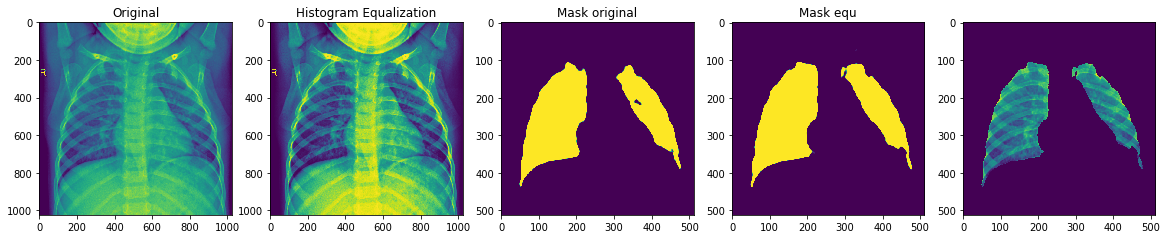

In [26]:
i = 4
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

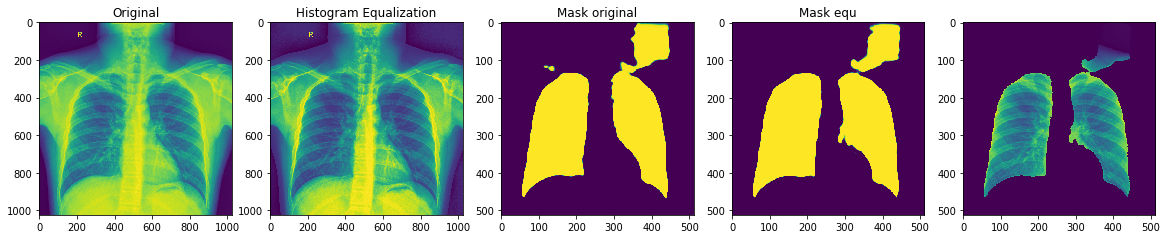

In [27]:
i = 5
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

In [28]:
i = 6
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

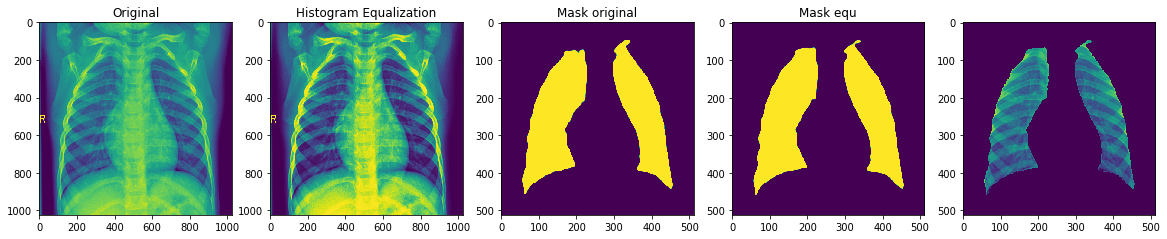

In [29]:
i = 7
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

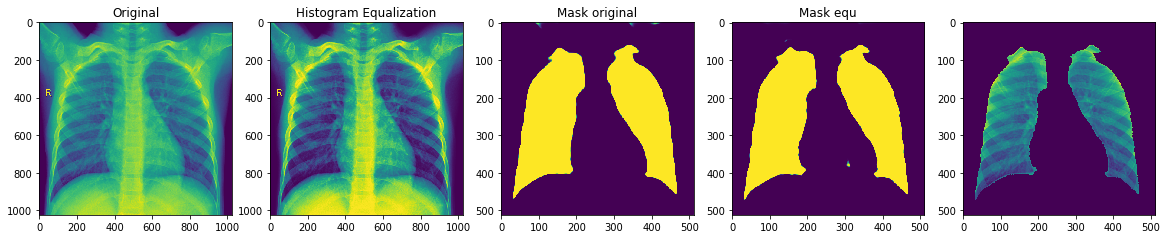

In [30]:
i = 8
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

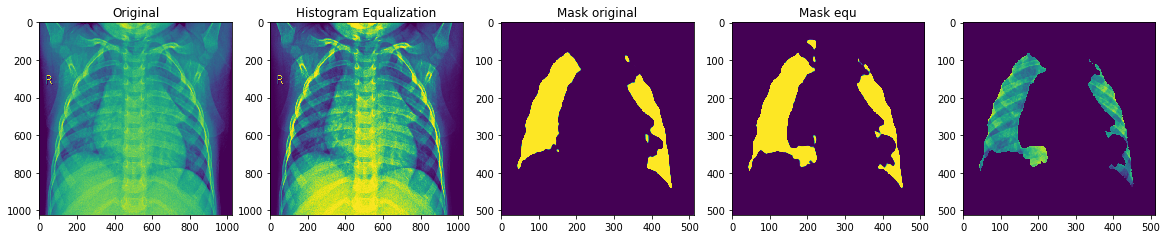

In [31]:
i = 9
compare_images(images[i], normal_hist[i], masks_normal[i], masks_normal_hist[i])

# Korekta gamma

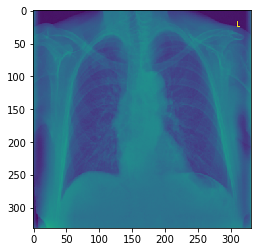

In [37]:
img = images_covid[9]
plt.imshow(img)

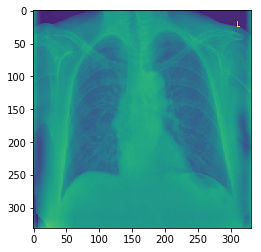

In [41]:
img_original = (img*255).astype(np.uint8)
lookUpTable = np.empty((1,256), np.uint8)
gamma = 0.4
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv2.LUT(img_original, lookUpTable)
plt.imshow(res)